<a href="https://colab.research.google.com/github/Bhawna4Nayak/skills-introduction-to-github/blob/main/EDA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 In-Depth Exploratory Data Analysis (EDA)
This notebook performs a comprehensive EDA on a complex dataset, focusing on:
- Understanding data distributions
- Identifying missing values
- Detecting outliers
- Uncovering relationships between variables

We’ll use `pandas`, `matplotlib`, `seaborn`, and `plotly`.

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## 🔽 Load Dataset

In [3]:
# Replace with your actual dataset path
df = pd.read_csv('/content/archive.zip')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 🧾 Basic Information and Summary

In [4]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


## ❓ Missing Values

In [5]:
# Count missing values
df.isnull().sum().sort_values(ascending=False)

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## 📈 Distribution of Numerical Features

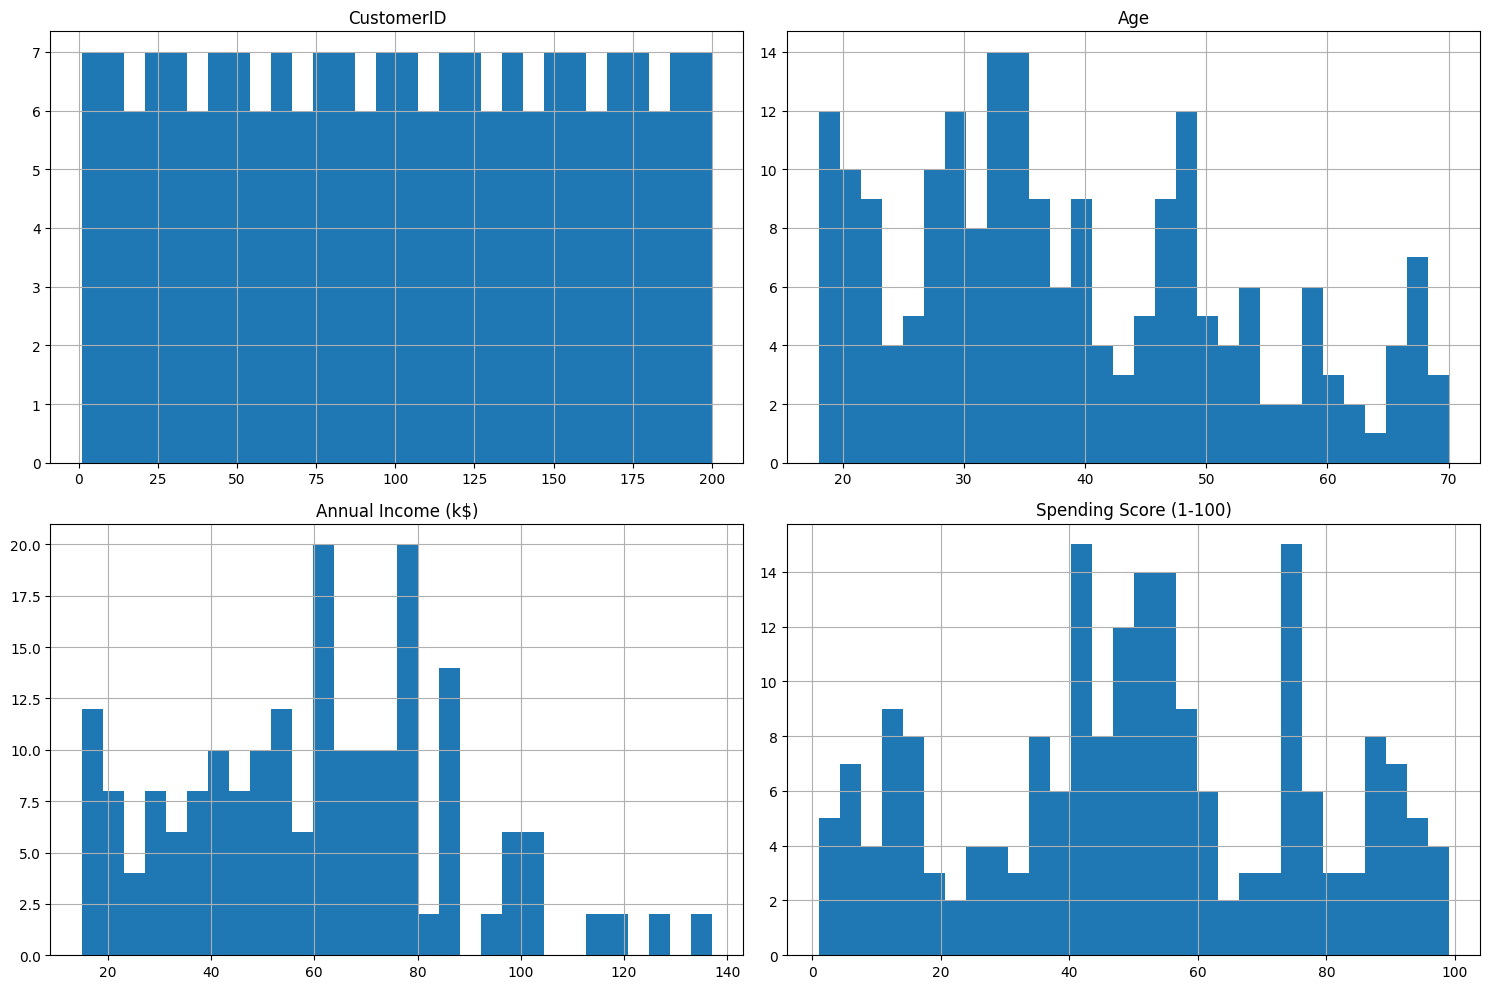

In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## 📦 Box Plots for Outlier Detection

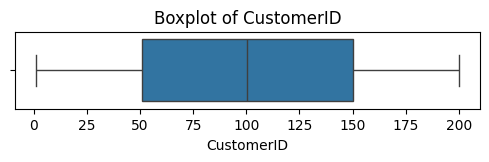

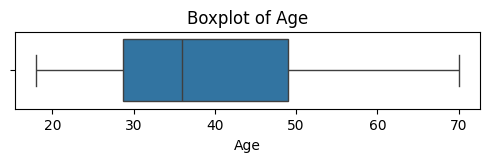

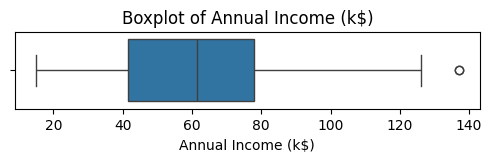

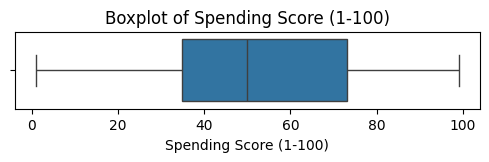

In [7]:
for col in numerical_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

## 📌 Correlation Heatmap

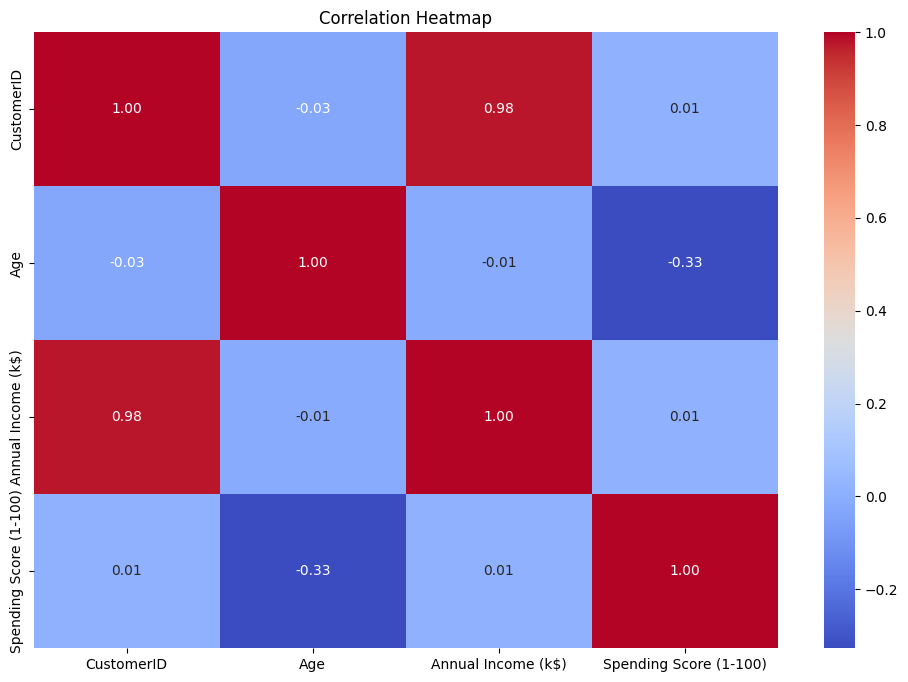

In [8]:
corr = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 🔍 Pairwise Relationships (optional for <10 features)

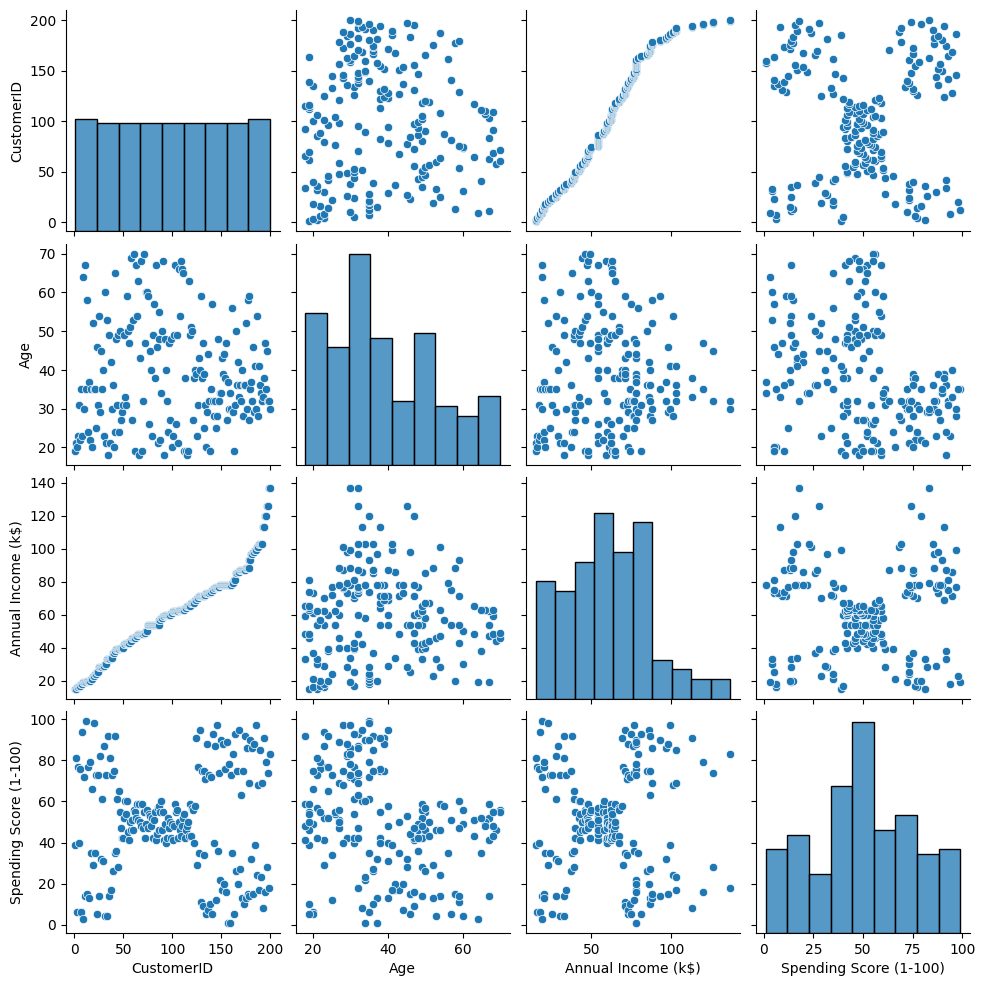

In [9]:
if len(numerical_cols) <= 10:
    sns.pairplot(df[numerical_cols].dropna())
    plt.show()